# **Fashion MNIST Data classification Project**


# Data Preprocessing:
1> Import libs
2> Load data
3> show image from number
4> change Dimension / Feature scalling

# Step 1) Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import keras 

# Step 2) Load Data:

In [2]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() # it is an inbuilt dataset provided by the tensorflow keras module

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Printing the shape of the data:

print(
    "Shape of X_train:-->  ",X_train.shape, "\n", 
    "Shape of X_test:-->  ",X_test.shape, "\n", 
    "Shape of y_train:->  ",y_train.shape, "\n", 
    "Shape of y_test:-->  ",y_test.shape
)

Shape of X_train:-->   (60000, 28, 28) 
 Shape of X_test:-->   (10000, 28, 28) 
 Shape of y_train:->   (60000,) 
 Shape of y_test:-->   (10000,)


In [4]:
# now we see the image data format from training data:

X_train[0]  # here we see the value of the 0th index of training data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

# Creating the class labels:

In [6]:
class_labels = ["T-shirt/Top",
                "Trouser", 
                "Pullover", 
                "Dress", 
                "Coat", 
                "Sandal", 
                "Shirt",
                "Sneker", 
                "Bag", 
                "Ankle boot"]  # those are the class labels which we used to predict output of the given input:

In [7]:
class_labels

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneker',
 'Bag',
 'Ankle boot']

# Step 3) Showing Images:

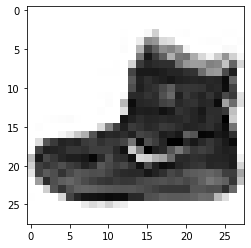

In [8]:
# now we see the image generated by the X_train dataset:

plt.imshow(X_train[0], cmap = "Greys") # here we see the grey scale image of the X_train[0] indexed values will formed in imaage

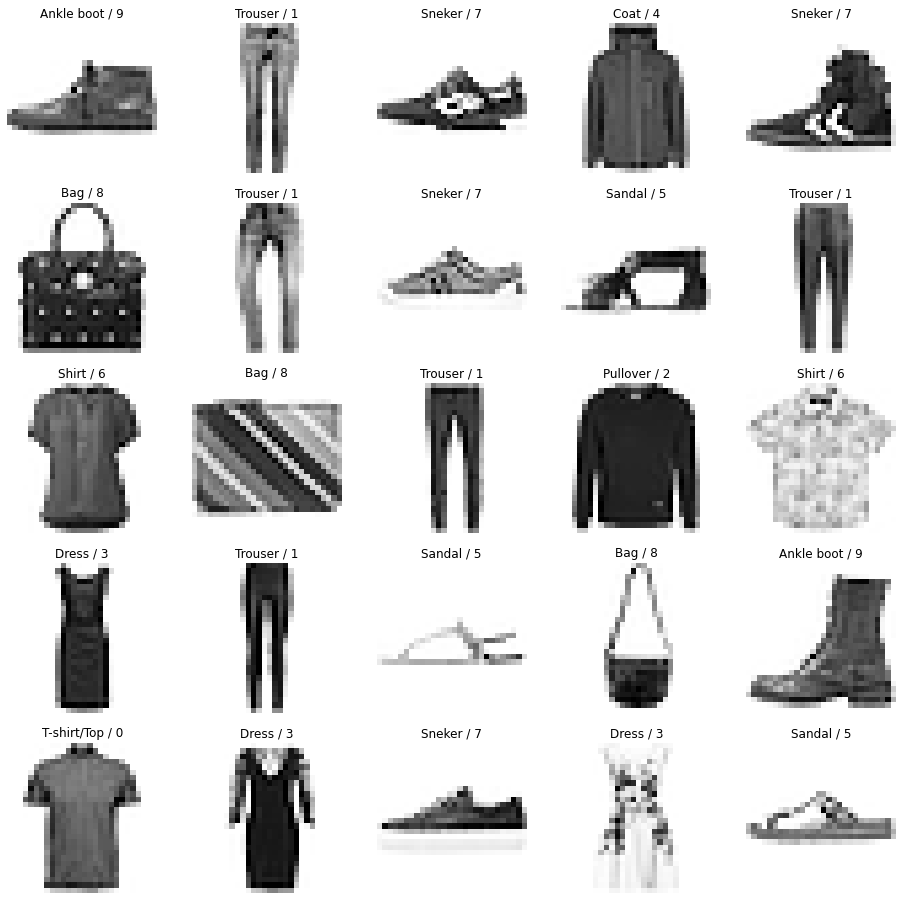

In [9]:
plt.figure(figsize = (16,16))
j = 1
for i in np.random.randint(0,1000, 25): # iterate random 25 samples in random range 0-1000
  plt.subplot(5,5, j); j+=1 # here we plot the 5X5 J-times subplots to locate our images in it 
  plt.imshow(X_train[i], cmap = "Greys") # 25 image will be selecting from the X_train dataset randomly 
  plt.axis("off") # here we off the axis 
  plt.title("{} / {}".format(class_labels[y_train[i]],y_train[i] )) # shows the title for all subplots

# Step 4) Change the dimensions / Feature scalling:

In [10]:
X_train.ndim

3

In [11]:
X_train = np.expand_dims(X_train, -1)

In [12]:
X_test.ndim

3

In [13]:
X_train.ndim

4

In [14]:
X_test = np.expand_dims(X_test, -1)

In [15]:
X_test.ndim

4

In [16]:
# feature scaling:


X_train = X_train / 255
X_test = X_test / 255

In [17]:
# splitting the dataset in the train, test, split:

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state=2020)

In [18]:
# printing the shape of the splited data:

print(
    "Shape of X_train:---> ", X_train.shape,"\n", 
    "Shape of X_validation:---> ",X_validation.shape,"\n",
    "Shape of y_train:---> ",y_train.shape,"\n",
    "Shape of y_validation:---> ",y_validation.shape

)

Shape of X_train:--->  (48000, 28, 28, 1) 
 Shape of X_validation:--->  (12000, 28, 28, 1) 
 Shape of y_train:--->  (48000,) 
 Shape of y_validation:--->  (12000,)


# Building the CNN model:



In [19]:
from warnings import filters
model = keras.models.Sequential([
                                keras.layers.Conv2D(
                                      filters = 32,
                                      kernel_size = 3, 
                                      strides = (1,1), 
                                      padding = "valid", 
                                      activation = "relu", 
                                      input_shape=[28,28,1]
                                  ),
                                 
                                 keras.layers.MaxPooling2D( pool_size = (2,2) ),

                                 keras.layers.Flatten(),

                                 keras.layers.Dense(units = 128, activation = "relu"),
                                 keras.layers.Dense(units = 10, activation = "softmax")

])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [21]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])  # compiling the model

In [22]:
model.fit(X_train, y_train, epochs = 10, batch_size = 512, verbose = 1, validation_data = (X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 27s 277ms/step - loss: 0.6243 - accuracy: 0.7956 - val_loss: 0.4208 - val_accuracy: 0.8512
Epoch 2/10
94/94 [==============================] - 16s 169ms/step - loss: 0.3696 - accuracy: 0.8710 - val_loss: 0.3560 - val_accuracy: 0.8784
Epoch 3/10
94/94 [==============================] - 16s 169ms/step - loss: 0.3244 - accuracy: 0.8863 - val_loss: 0.3236 - val_accuracy: 0.8878
Epoch 4/10
94/94 [==============================] - 16s 173ms/step - loss: 0.2942 - accuracy: 0.8969 - val_loss: 0.3123 - val_accuracy: 0.8907
Epoch 5/10
94/94 [==============================] - 17s 181ms/step - loss: 0.2735 - accuracy: 0.9034 - val_loss: 0.3055 - val_accuracy: 0.8914
Epoch 6/10
94/94 [==============================] - 17s 184ms/step - loss: 0.2607 - accuracy: 0.9081 - val_loss: 0.2852 - val_accuracy: 0.8995
Epoch 7/10
94/94 [==============================] - 16s 174ms/step - loss: 0.2420 - accuracy: 0.9134 - val_loss: 0.2769 - val_accuracy: 0.9048

In [23]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 6ms/step


array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.15, 0.03, 0.  ]], dtype=float32)

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2735 - accuracy: 0.9001


[0.2734904885292053, 0.9000999927520752]

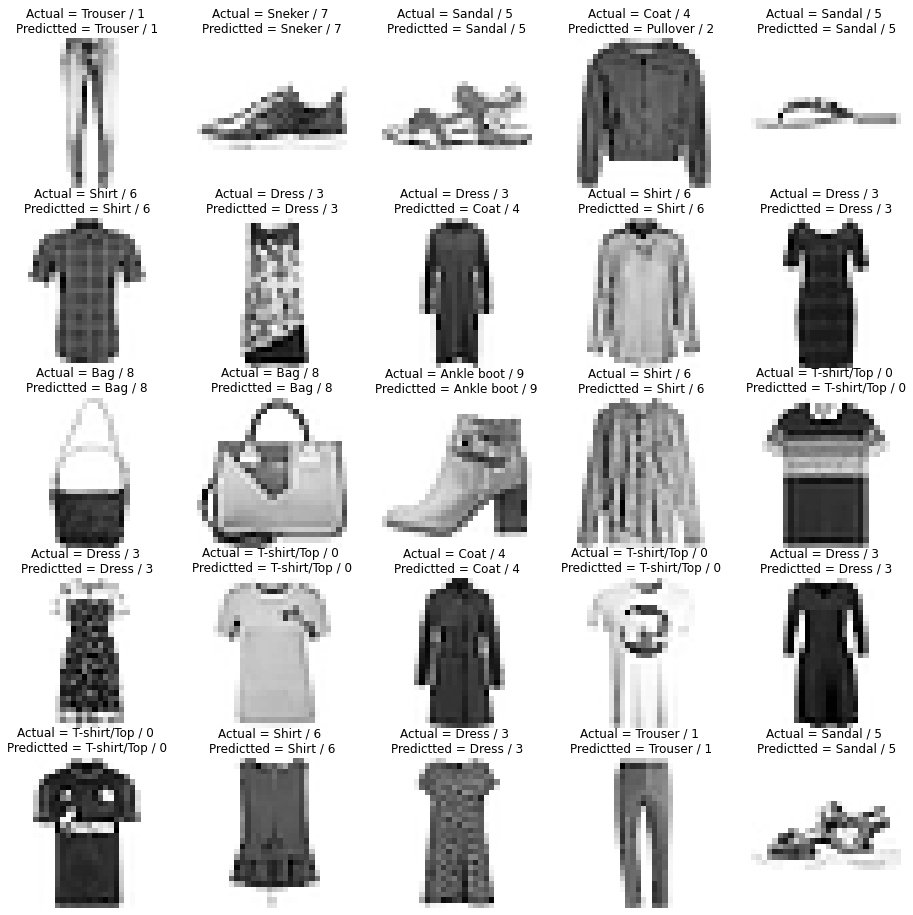

In [25]:
plt.figure(figsize = (16,16))
j = 1
for i in np.random.randint(0,1000, 25): # iterate random 25 samples in random range 0-1000
  plt.subplot(5,5, j); j+=1 # here we plot the 5X5 J-times subplots to locate our images in it 
  plt.imshow(X_test[i].reshape(28,28), cmap = "Greys") # 25 image will be selecting from the X_test dataset randomly 
  plt.title("Actual = {} / {} \nPredictted = {} / {}".format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis("off") # here we off the axis 

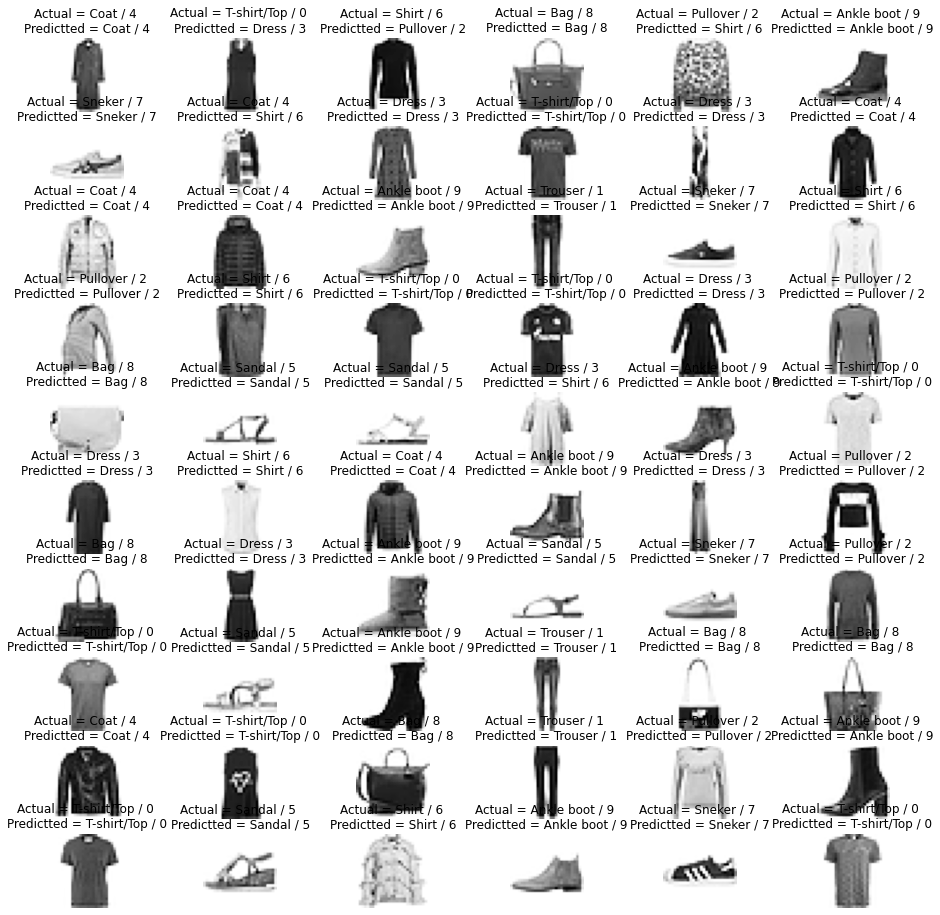

In [26]:
plt.figure(figsize = (16,16))
j = 1
for i in np.random.randint(0,1000, 60): # iterate random 25 samples in random range 0-1000
  plt.subplot(10,6, j); j+=1 # here we plot the 5X5 J-times subplots to locate our images in it 
  plt.imshow(X_test[i].reshape(28,28), cmap = "Greys") # 25 image will be selecting from the X_test dataset randomly 
  plt.title("Actual = {} / {} \nPredictted = {} / {}".format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis("off") # here we off the axis 

# Confusion Matrix:

In [27]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16, 9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/Top       0.89      0.80      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.86      0.84      1000
       Dress       0.90      0.89      0.90      1000
        Coat       0.81      0.89      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.73      0.72      0.72      1000
      Sneker       0.94      0.97      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



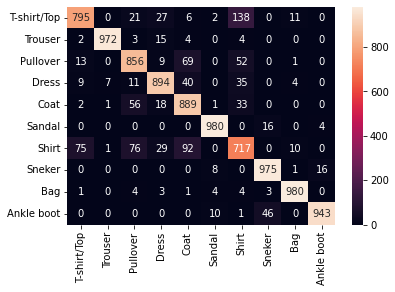

In [28]:
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels=class_labels, yticklabels=class_labels)
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names = class_labels)
print(cr)

# Saving the model:

In [29]:
model.save('fashion_mnist_trained_model.h5') # saving the model

# Building two complex CNN models:


In [41]:
model2 = keras.models.Sequential([
                      keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = (1,1), padding = "valid", activation = 'relu', input_shape = [28, 28, 1]),
                      keras.layers.MaxPool2D(pool_size = (2,2)),
                      keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu'),
                      keras.layers.MaxPool2D(pool_size = (2,2)),
                      keras.layers.Flatten(),
                      keras.layers.Dense(units = 128, activation = 'relu'),
                      keras.layers.Dropout(0.25),
                      keras.layers.Dense(units = 256, activation = 'relu'),
                      keras.layers.Dropout(0.25),
                      keras.layers.Dense(units = 128, activation = 'relu'),
                      keras.layers.Dense(units = 10, activation = 'softmax')
])


# compile the model:

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [42]:
# training the cnn_model2:

model2.fit(X_train, y_train, epochs = 20, batch_size = 512, verbose = 1, validation_data = (X_validation, y_validation))
model2.save("fashion_mnist_cnn_model_2.h5")

Epoch 1/20
94/94 [==============================] - 21s 209ms/step - loss: 1.0408 - accuracy: 0.6109 - val_loss: 0.6057 - val_accuracy: 0.7622
Epoch 2/20
94/94 [==============================] - 20s 212ms/step - loss: 0.5744 - accuracy: 0.7838 - val_loss: 0.4802 - val_accuracy: 0.8212
Epoch 3/20
94/94 [==============================] - 20s 215ms/step - loss: 0.4771 - accuracy: 0.8205 - val_loss: 0.4228 - val_accuracy: 0.8411
Epoch 4/20
94/94 [==============================] - 21s 224ms/step - loss: 0.4201 - accuracy: 0.8474 - val_loss: 0.3684 - val_accuracy: 0.8645
Epoch 5/20
94/94 [==============================] - 20s 215ms/step - loss: 0.3838 - accuracy: 0.8597 - val_loss: 0.3537 - val_accuracy: 0.8720
Epoch 6/20
94/94 [==============================] - 20s 214ms/step - loss: 0.3516 - accuracy: 0.8706 - val_loss: 0.3424 - val_accuracy: 0.8733
Epoch 7/20
94/94 [==============================] - 20s 215ms/step - loss: 0.3280 - accuracy: 0.8785 - val_loss: 0.3219 - val_accuracy: 0.8792

In [43]:
model3 = keras.models.Sequential([
                      keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = (1,1), padding = "valid", activation = 'relu', input_shape = [28, 28, 1]),
                      keras.layers.MaxPool2D(pool_size = (2,2)),
                      keras.layers.Conv2D(filters = 128, kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu'),
                      keras.layers.MaxPool2D(pool_size = (2,2)),
                      keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu'),
                      keras.layers.MaxPool2D(pool_size = (2,2)),
                      keras.layers.Flatten(),
                      keras.layers.Dense(units = 128, activation = 'relu'),
                      keras.layers.Dropout(0.25),
                      keras.layers.Dense(units = 256, activation = 'relu'),
                      keras.layers.Dropout(0.5),
                      keras.layers.Dense(units = 256, activation = 'relu'),
                      keras.layers.Dropout(0.25),
                      keras.layers.Dense(units = 128, activation = 'relu'),
                      keras.layers.Dropout(0.10),
                      keras.layers.Dense(units = 10, activation = 'softmax')
])


# compile the model:

model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


# training the cnn_model2:

model3.fit(X_train, y_train, epochs = 50, batch_size = 512, verbose = 1, validation_data = (X_validation, y_validation))
model3.save("fashion_mnist_cnn_model_3.h5")
model3.evaluate(X_test, y_test)

Epoch 1/50
94/94 [==============================] - 28s 291ms/step - loss: 1.2381 - accuracy: 0.5135 - val_loss: 0.6442 - val_accuracy: 0.7498
Epoch 2/50
94/94 [==============================] - 27s 286ms/step - loss: 0.6314 - accuracy: 0.7627 - val_loss: 0.5010 - val_accuracy: 0.8046
Epoch 3/50
94/94 [==============================] - 27s 289ms/step - loss: 0.5096 - accuracy: 0.8127 - val_loss: 0.4269 - val_accuracy: 0.8381
Epoch 4/50
94/94 [==============================] - 28s 295ms/step - loss: 0.4392 - accuracy: 0.8414 - val_loss: 0.3867 - val_accuracy: 0.8579
Epoch 5/50
94/94 [==============================] - 27s 288ms/step - loss: 0.3937 - accuracy: 0.8596 - val_loss: 0.3485 - val_accuracy: 0.8714
Epoch 6/50
94/94 [==============================] - 28s 296ms/step - loss: 0.3525 - accuracy: 0.8732 - val_loss: 0.3390 - val_accuracy: 0.8773
Epoch 7/50
94/94 [==============================] - 29s 309ms/step - loss: 0.3271 - accuracy: 0.8831 - val_loss: 0.3279 - val_accuracy: 0.8808

[0.4794104993343353, 0.8973000049591064]

In [44]:
# here we can see the loss function gives 0.4794% and our complex model gives us 0.89% average accuracy:

# Testing the complex model2, and model3:

In [49]:
prediction_of_model2 = model2.predict(X_test)
prediction_of_model2.round(2)

313/313 [==============================] - 2s 7ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.67, 0.  , 0.01]], dtype=float32)

In [50]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2647 - accuracy: 0.9072


[0.2646941542625427, 0.9071999788284302]

In [51]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [46]:
prediction_of_model3 = model3.predict(X_test)
prediction_of_model3.round(2)

313/313 [==============================] - 3s 9ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.21, 0.  , 0.  ]], dtype=float32)

In [52]:
model3.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.4794 - accuracy: 0.8973


[0.4794104993343353, 0.8973000049591064]

In [53]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 128)         36992     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 3, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 1, 1, 64)        